                     counts  speed  std    link
2015-01-02 00:00:00     NaN    NaN  NaN  123007
2015-01-02 00:05:00     0.0    NaN  NaN  123007
2015-01-02 00:10:00     0.0    NaN  NaN  123007
2015-01-02 00:15:00     0.0    NaN  NaN  123007
2015-01-02 00:20:00     0.0    NaN  NaN  123007
                     counts  speed  std    link
2015-01-02 00:00:00     0.0    0.0  0.0  123007
2015-01-02 00:05:00     0.0    0.0  0.0  123007
2015-01-02 00:10:00     0.0    0.0  0.0  123007
2015-01-02 00:15:00     0.0    0.0  0.0  123007
2015-01-02 00:20:00     0.0    0.0  0.0  123007
(9999, 4)


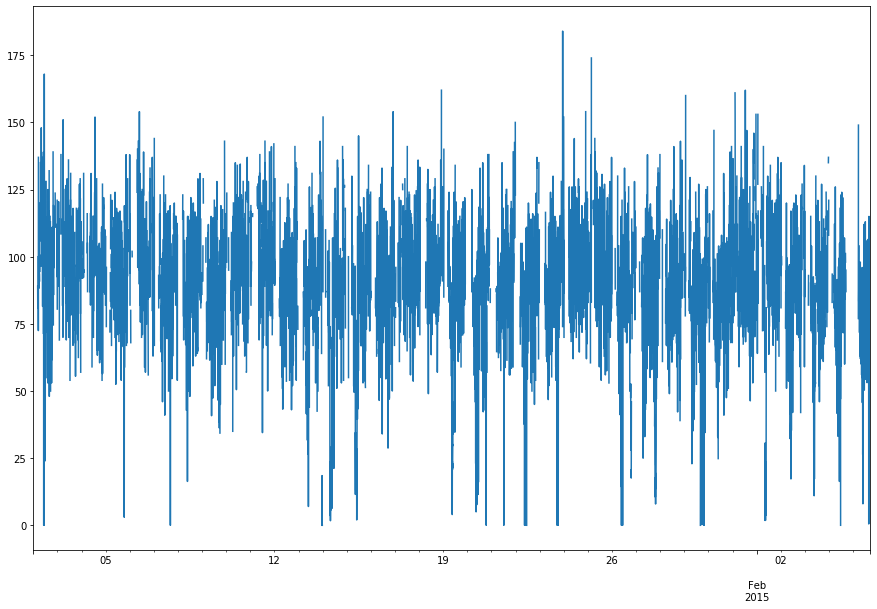

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from statsmodels.tsa.arima_model import ARIMA




#Reading .csv file(Floating car data) which is raw data and its plot.

def parser(x):
    return datetime.strptime(x, '%Y-%m-%d %H:%M:%S')


df = pd.read_csv('F:/PROVA FINALE/FCD_aggregated_10k.csv',header = 0, index_col=0, parse_dates=[0], date_parser=parser)
print(df.head())

plt.figure(figsize=(15,10))
df['speed'].plot()




#Preprocessed data
#From the above checks we can simply fill Nan values with zero
df1 = df.fillna(0)
print(df1.head())

print(df1.shape)

df2 = df1['speed']


#Splitting data into 5min,10min,15min,30min,1hour,day


ten = df2.rolling(window = 2).mean()
fifteen = df2.rolling(window = 3).mean()
half = df2.rolling(window = 6).mean()
df2_mean = df2.rolling(window = 12).mean()
df2_mean_daily = df2.rolling(window = 288).mean()

                             ARIMA Model Results                              
Dep. Variable:                D.speed   No. Observations:                 9998
Model:                 ARIMA(3, 1, 0)   Log Likelihood              -36987.048
Method:                       css-mle   S.D. of innovations              9.782
Date:                Fri, 09 Apr 2021   AIC                          73984.095
Time:                        22:17:05   BIC                          74020.146
Sample:                    01-31-2015   HQIC                         73996.298
                         - 02-28-2015                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0070      0.102      0.069      0.945      -0.193       0.207
ar.L1.D.speed     0.0492      0.010      4.918      0.000       0.030       0.069
ar.L2.D.speed    -0.0151      0.010     

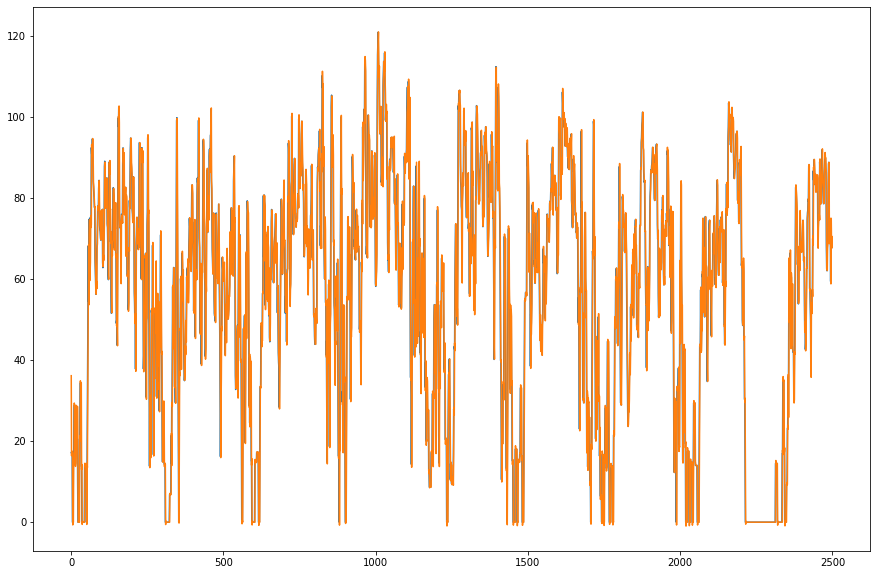

In [10]:
fcd = half.fillna(0)

fcd.index = fcd.index.to_period('M')
# Fitting the ARIMA model
model = ARIMA(fcd, order=(3,1,0))
model_fit = model.fit()

print(model_fit.summary())



# Creating train and test data

X = fcd.values
size = int(len(X) * 0.75)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# validatin of data
for t in range(len(test)):
  model = ARIMA(history, order=(2,1,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  ciao = output[0]
  predictions.append(ciao)
  prego = test[t]
  history.append(prego)
  print('predicted=%f, expected=%f' % (ciao, prego))

    

plt.figure(figsize=(15,10))
plt.plot(test)
plt.plot(predictions)

In [8]:
#Calculating Root mean squared error
from sklearn.metrics import mean_squared_error
from math import sqrt

print(sqrt(mean_squared_error(test, predictions)))



#Calculating mean absolute error
from sklearn.metrics import mean_absolute_error
import numpy as np

print(mean_absolute_error(test, predictions, multioutput='raw_values'))


#Calculating mean absolute percentage error
def mean_absolute_percentage_error(test, predictions):
    
  MAPE = []

  for i in range(len(test)):
    x = test[i]
    y = predictions[i]
    if x == 0:
      pass
    else:
      MAPE.append(np.abs((x-y)/x) * 100)
  return np.mean(MAPE)
  

print(mean_absolute_percentage_error(test, predictions))




#Calculating absolute percentage error greater than 10%
def mean_absolute_percentage_error1(test, predictions):
    
  MAPE0 = []
  

  for i in range(len(test)):
    x = test[i]
    y = predictions[i]
    if x == 0:
      pass
    else:
      B = np.abs((x-y)/x) * 100
      if B >10:
        MAPE0.append(B)


  return ((len(MAPE0)/3400)*100)
print(mean_absolute_percentage_error1(test, predictions))

13.492668913629048
[9.15384712]
882434047386927.4
30.5
